In [3]:
#Import the packages
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC , NuSVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics  
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
import os 
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import cross_val_score
import pylab as pl
import pandas as pd
from sklearn.utils.multiclass import unique_labels

## LOAD THE DATASETS
8330 samples and 7 features.

In [6]:
def load_dataset():
    load = sio.loadmat('features(10)_cwt')
    features = np.array(load['features'])
    #print(features.shape)
    load = sio.loadmat('SC4001E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = b[800:1633,1]
    load = sio.loadmat('SC4011E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4012E0-PSG_hyp.mat') 
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4021E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4022E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4031E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4032E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4041E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4042E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4051E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    #print(max(labels))
    labels = np.where(labels==4,3,labels)
    labels = np.where(labels==6,0,labels)
    labels = np.where(labels==5,4,labels)
    #print(len(np.where(labels==1)[0]))
    #print(max(labels))
    feat = features[800:1633,:]
    #print(feat.shape)
    for i in range (1,10):
        feat =  np.append(features[800+i*1633:1633+i*1633,:],feat,axis=0) 
    #print(feat.shape)
    return feat, labels

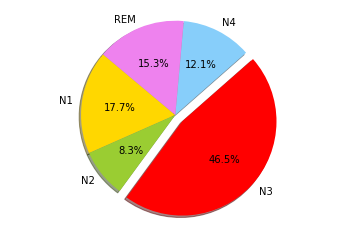

In [18]:
def plot_pie(data,labels):
    unique , counts = np.unique(data, return_counts=True)
    colors = ['gold', 'yellowgreen', 'red', 'lightskyblue', 'violet']
    explode = (0, 0, 0.1, 0,0)  # explode 1st slice

    # Plot
    plt.pie(counts, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    return
plot_pie(labels,['N1','N2','N3','N4','REM'])
    

## PERCEPTRON ALGORITHM
The algorithm failed to converge (tol=1e-3) even after 50,000 iterations (max_iter=10 given below for quick runtime but it was tested for max_iter=50000). Convergence is based on the Avg. Loss between sucessive iterations being lower than tolerance. The data set may not be linearly separable and will require kernels in the SVM

In [5]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
perceptron =linear_model.Perceptron(penalty='l2',max_iter=10,verbose=2)
perceptron.fit(x_train,y_train)

-- Epoch 1
Norm: 5.38, NNZs: 7, Bias: -5.000000, T: 7497, Avg. loss: 1.264573
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.09, NNZs: 7, Bias: -7.000000, T: 14994, Avg. loss: 1.265807
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.24, NNZs: 7, Bias: -3.000000, T: 22491, Avg. loss: 1.271815
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.66, NNZs: 7, Bias: -2.000000, T: 29988, Avg. loss: 1.308321
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.62, NNZs: 7, Bias: -6.000000, T: 37485, Avg. loss: 1.231258
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.64, NNZs: 7, Bias: -4.000000, T: 44982, Avg. loss: 1.292754
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.17, NNZs: 7, Bias: -5.000000, T: 52479, Avg. loss: 1.282312
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 4.61, NNZs: 7, Bias: -4.000000, T: 59976, Avg. loss: 1.269889
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.19, NNZs: 7, Bias: -6.000000, T: 67473, Avg. loss: 1.230382
Total trai

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=2, warm_start=False)

## SVM
10% of dataset is used for testing and 90% for testing. Cross validation was done using k-fold cross validation with $k=5$ and validation was made based using classification accuracy as the scoring metric. The hyperparameters explored here were: 'gamma' for regularization and 'C' for the penalty parameter of the error fucntion. The kernel used was the 'radial basis function'. The polynomial and sigmoid functions were also experimented with (not shown in the code below; just set kernel='sigmoid' in line 7 if required) but did not improve accuracy. Graphs of accuracy accross the variation of hyper parameters are shown. 

In [1]:
def svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param):
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    if use_preset_param==False:
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=i)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number fo gamma: ", i)
        plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs gamma Value')  
        plt.xlabel('gamma Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        gamma = (np.argmax(acc)+1)/1
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=gamma,C=i/10)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number for C: ", i)
        plt.figure(figsize=(12, 6)) 
        plt_x = np.linspace(0.1,1.9,num=19)
        plt.plot(plt_x, acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs C Value')  
        plt.xlabel('C Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        C = (np.argmax(acc)+1)/10
        svclassifier = SVC(kernel='rbf',gamma=gamma,C=C)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
        print("Max accuracy during cross-validation:", max(acc))
        print("Gamma optimum = ",gamma)
        print("C optimum =", C)
    elif use_preset_param==True:
        svclassifier = SVC(kernel='rbf',cache_size=1000,gamma=3,C=1)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
    return svclassifier , y_pred   

In [2]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
#set use_preset_param to False to view the results of cross-validation of hyperparameters
#set use_preset_param to True to see pre-calculated optimum values of hyperparameters for quick results.
svclassifier, y_pred = svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param=False)
print("Accuracy on test dataset:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))

NameError: name 'load_dataset' is not defined

## PLOT CONFUSION MATRIX
SVM classifies label 0 and 2 with highest precision and recall. The classifer find it hard to detect labels 1 and 3. Most of the predictions are labels 0 , 2 and 4. These probably have higher difference in features between them, making them easier to classify among themselves. 

Confusion matrix, without normalization
[[ 88  11  40   0  17]
 [ 28   6  23   0   6]
 [130  29 132   8  66]
 [ 43  12  32   1  12]
 [ 55  14  49   1  30]]
Normalized confusion matrix
[[0.56 0.07 0.26 0.   0.11]
 [0.44 0.1  0.37 0.   0.1 ]
 [0.36 0.08 0.36 0.02 0.18]
 [0.43 0.12 0.32 0.01 0.12]
 [0.37 0.09 0.33 0.01 0.2 ]]


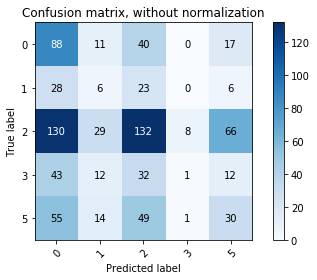

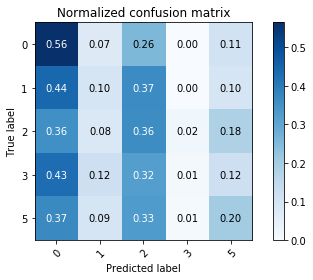

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = [0,1,2,3,5]
class_names = np.array(class_names)
class_names = class_names.astype(int)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

## KNN ALGORITHM
A KNN algorithm was run on the dataset. The number of nearest neighbours was determined again by cross-validation and optimum value of neighbours was used to finally classify the dataset. Plots of accruacy across number of neighbours is shown below along with the accuracy, confusion matrix and classification metrics are shown below:

max accuracy during training = 0.5274068395738144
Accuracy on the test dataset: 0.517406962785114
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       156
           1       0.50      0.05      0.09        63
           2       0.51      0.85      0.64       365
           3       0.39      0.16      0.23       100
           4       0.50      0.12      0.19       149

   micro avg       0.52      0.52      0.52       833
   macro avg       0.50      0.34      0.34       833
weighted avg       0.51      0.52      0.45       833

Confusion matrix, without normalization
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
Normalized confusion matrix
[[0.54 0.   0.4  0.03 0.02]
 [0.08 0.05 0.83 0.02 0.03]
 [0.1  0.01 0.85 0.03 0.02]
 [0.16 0.01 0.61 0.16 0.06]
 

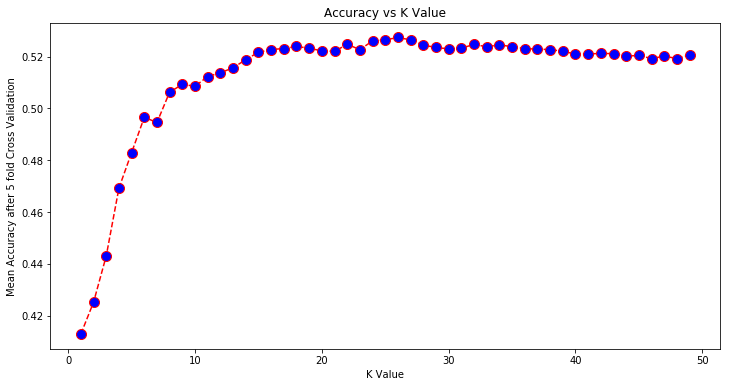

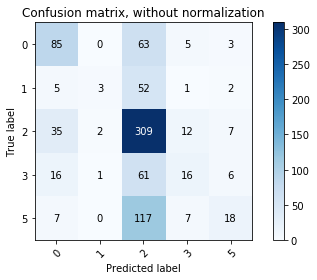

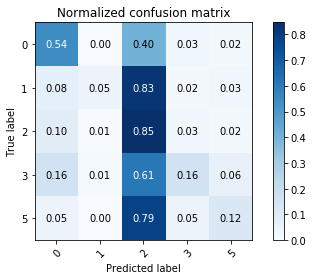

In [22]:
feat, labels = load_dataset()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
acc = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_i = knn.predict(x_test)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    acc.append(np.mean(scores))
    #print("err=", np.mean(pred_i != y_test))
    #print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))
    #print(metrics.confusion_matrix(y_test, pred_i))  
    #print(metrics.classification_report(y_test, pred_i))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
print("Max accuracy during Cross Validation =",max(acc))
k=np.argmax(acc)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy on the test dataset:",metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')